<a href="https://colab.research.google.com/github/NguyenQuanManh/TTNT/blob/main/BT_Rain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.2 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=d7f2af63bf08e5ab4d69c7acf30b500e675f283ba5519706d806aa54d456a442
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


5.166666666666714


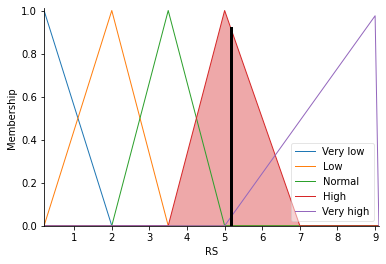

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
TP = ctrl.Antecedent(np.arange(20.4,41.3,0.1),'TP')
Ws = ctrl.Antecedent(np.arange(0.7,3.2,0.1),'WS')
Rs = ctrl.Consequent(np.arange(0.2,9.2,0.1),'RS')
TP['Very low']=fuzz.trimf(TP.universe,[20.4,20.4,23])
TP['Low']=fuzz.trimf(TP.universe,[20.4,23,27.3])
TP['Normal']=fuzz.trimf(TP.universe,[23,27.3,30])
TP['High']=fuzz.trimf(TP.universe,[27.3,30,35])
TP['Very High']=fuzz.trimf(TP.universe,[30,41.2,41.2])
Ws['Very low']=fuzz.trimf(Ws.universe,[0.7,0.7,1])
Ws['Low']=fuzz.trimf(Ws.universe,[0.7,1,1.5])
Ws['Normal']=fuzz.trimf(Ws.universe,[1,1.5,2.5])
Ws['High']=fuzz.trimf(Ws.universe,[1.5,2.5,3])
Ws['Very high']=fuzz.trimf(Ws.universe,[2.5,3.1,3.1])
Rs['Very low']=fuzz.trimf(Rs.universe,[0.2,0.2,2])
Rs['Low']=fuzz.trimf(Rs.universe,[0.2,2,3.5])
Rs['Normal']=fuzz.trimf(Rs.universe,[2,3.5,5])
Rs['High']=fuzz.trimf(Rs.universe,[3.5,5,7])
Rs['Very high']=fuzz.trimf(Rs.universe,[5,9.1,9.1])

rule1 = ctrl.Rule(TP['Very low']&Ws['Very low'],Rs['Very low'])
rule2 = ctrl.Rule(TP['Very low']&Ws['Low'],Rs['Very low'])
rule3 = ctrl.Rule(TP['Very low']&Ws['Normal'],Rs['Low'])
rule4 = ctrl.Rule(TP['Very low']&Ws['High'],Rs['Normal'])
rule5 = ctrl.Rule(TP['Very low']&Ws['Very high'],Rs['Normal'])
rule6 = ctrl.Rule(TP['Low']&Ws['Very low'],Rs['Very low'])
rule7 = ctrl.Rule(TP['Low']&Ws['Low'],Rs['Low'])
rule8 = ctrl.Rule(TP['Low']&Ws['Normal'],Rs['Normal'])
rule9 = ctrl.Rule(TP['Low']&Ws['High'],Rs['Normal'])
rule10 = ctrl.Rule(TP['Low']&Ws['Very high'],Rs['High'])
rule11 = ctrl.Rule(TP['Normal']&Ws['Very low'],Rs['Low'])
rule12 = ctrl.Rule(TP['Normal']&Ws['Low'],Rs['Normal'])
rule13= ctrl.Rule(TP['Normal']&Ws['Normal'],Rs['Normal'])
rule14= ctrl.Rule(TP['Normal']&Ws['High'],Rs['High'])
rule15= ctrl.Rule(TP['Normal']&Ws['Very high'],Rs['High'])
rule16= ctrl.Rule(TP['High']&Ws['Very low'],Rs['Normal'])
rule17= ctrl.Rule(TP['High']&Ws['Low'],Rs['Normal'])
rule18= ctrl.Rule(TP['High']&Ws['Normal'],Rs['High'])
rule19= ctrl.Rule(TP['High']&Ws['High'],Rs['High'])
rule20= ctrl.Rule(TP['High']&Ws['Very high'],Rs['High'])
rule21= ctrl.Rule(TP['Very High']&Ws['Very low'],Rs['Normal'])
rule22= ctrl.Rule(TP['Very High']&Ws['Low'],Rs['Normal'])
rule23= ctrl.Rule(TP['Very High']&Ws['Normal'],Rs['High'])
rule24= ctrl.Rule(TP['Very High']&Ws['High'],Rs['Very high'])
rule25= ctrl.Rule(TP['Very High']&Ws['Very high'],Rs['Very high'])
Rs_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
Rss = ctrl.ControlSystemSimulation(Rs_ctrl)
Rss.input['TP'] = 30
Rss.input['WS'] = 5
Rss.compute()
print(Rss.output['RS'])
Rs.view(sim = Rss)

